# Customer Segmentation Using Unsupervised Learning Algorithms
DataSet avaialable in https://www.kaggle.com/samratp/creating-customer-segments?select=customers.csv

In this Project we will apply different clustring techniques including KMeans, DBSCAN and Gausian Mixture to cluster the data about annual expenditure on products including Fresh product, Milk, Grocery, Frozen and Detergent/paper products.

But before that we will explore the data inorder to unearth some insights, clean the data, detect and remove the outliers using different techniques including Quantile.

We then will proceed dimenssional reduction process.
Then the processed data will go through the clustering.

# Import all required libraries

In [911]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Loading the Data in form of a dataframe

In [912]:
df=pd.read_csv("C://Users//Dataset//Wholesale customers data.csv")

# Data Set Information


Attribute:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous);

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous);

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: Hotel/Restaurant/Cafee channel or Retail channel (Nominal);

8) REGION: customers Region, Lisnon, Oporto or Other (Nominal);


# Exploring the data

In [913]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [914]:
print("Shape of the data is: ",df.shape)

Shape of the data is:  (440, 8)


In [915]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [916]:
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,2,3,16117,46197,92780,1026,40827,2944
141,1,3,30379,13252,5189,321,51,1450
178,1,3,11002,7075,4945,1152,120,395
110,1,3,11818,1648,1694,2276,169,1647
33,1,3,29729,4786,7326,6130,361,1083


In [917]:
print("information about the data set including data types")
print("")
df.info()

information about the data set including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [918]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [919]:
features=df.columns.unique()

In [920]:
for i,fea in enumerate(features):
    print ("Feature",i+1,":", fea)

Feature 1 : Channel
Feature 2 : Region
Feature 3 : Fresh
Feature 4 : Milk
Feature 5 : Grocery
Feature 6 : Frozen
Feature 7 : Detergents_Paper
Feature 8 : Delicatessen


In [921]:
df['Channel'].unique()

array([2, 1], dtype=int64)

Channel 1: Hotel/Restaurant
Channel 2: Retail

In [922]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

Region 1: Lisnon
Region 2: Porto
Region 3: Other

In [923]:
print("Total centers in each region: ")
df.Region.value_counts()

Total centers in each region: 


3    316
1     77
2     47
Name: Region, dtype: int64

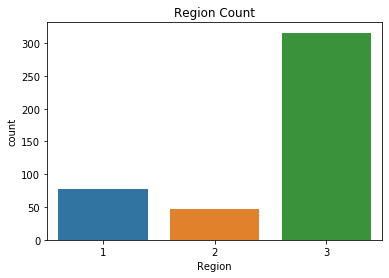

In [924]:
sns.countplot(df.Region)
plt.title('Region Count')
plt.show()

# Discovering Correlation rate of the features

In [925]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Depicting the correlations between features

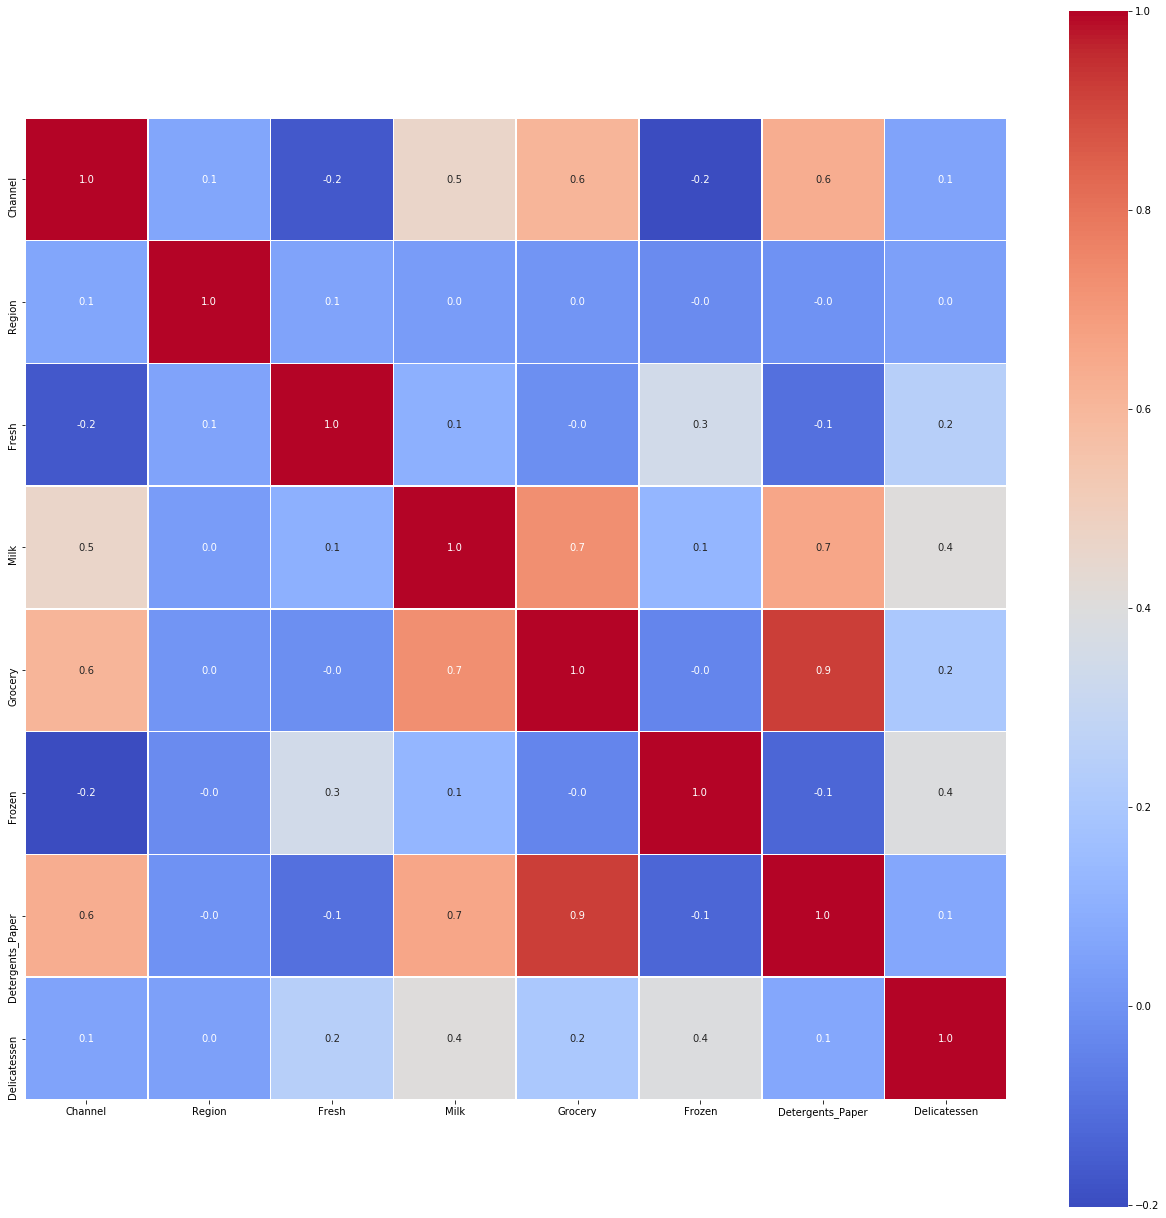

In [926]:
correlation = df.corr() 
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(correlation, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.7, ax=ax)


Histogram to depict the distribution of data

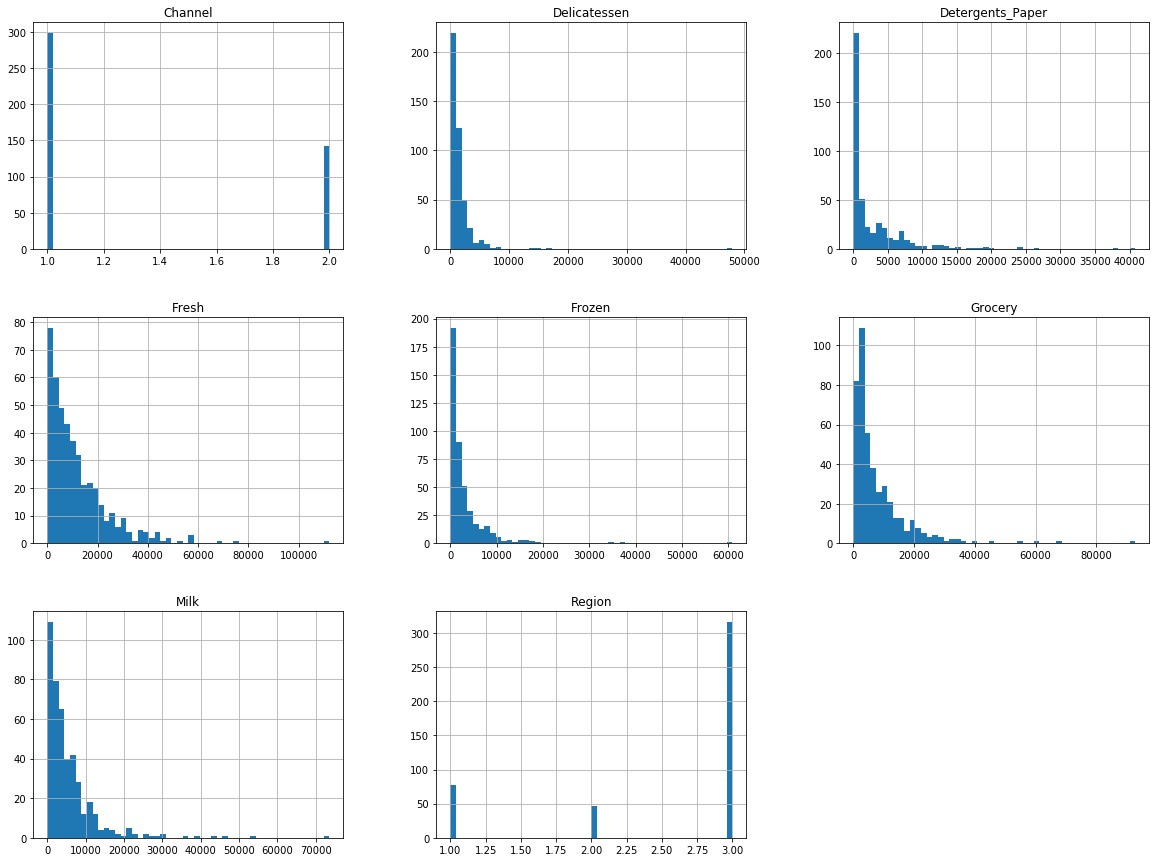

In [927]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# BarPlot
A bar plot is a useful tool to plot categorical data in the form of rectangular bars where heights of bars are proportional to the numeric value represented by the corresponding categorical columns.

For example use this plot to investigate those who interested in Fresh food how much interested also in Frozen products and also to see in each region what is the tendency of people, they mostly choose Fresh product or Frozen ones.

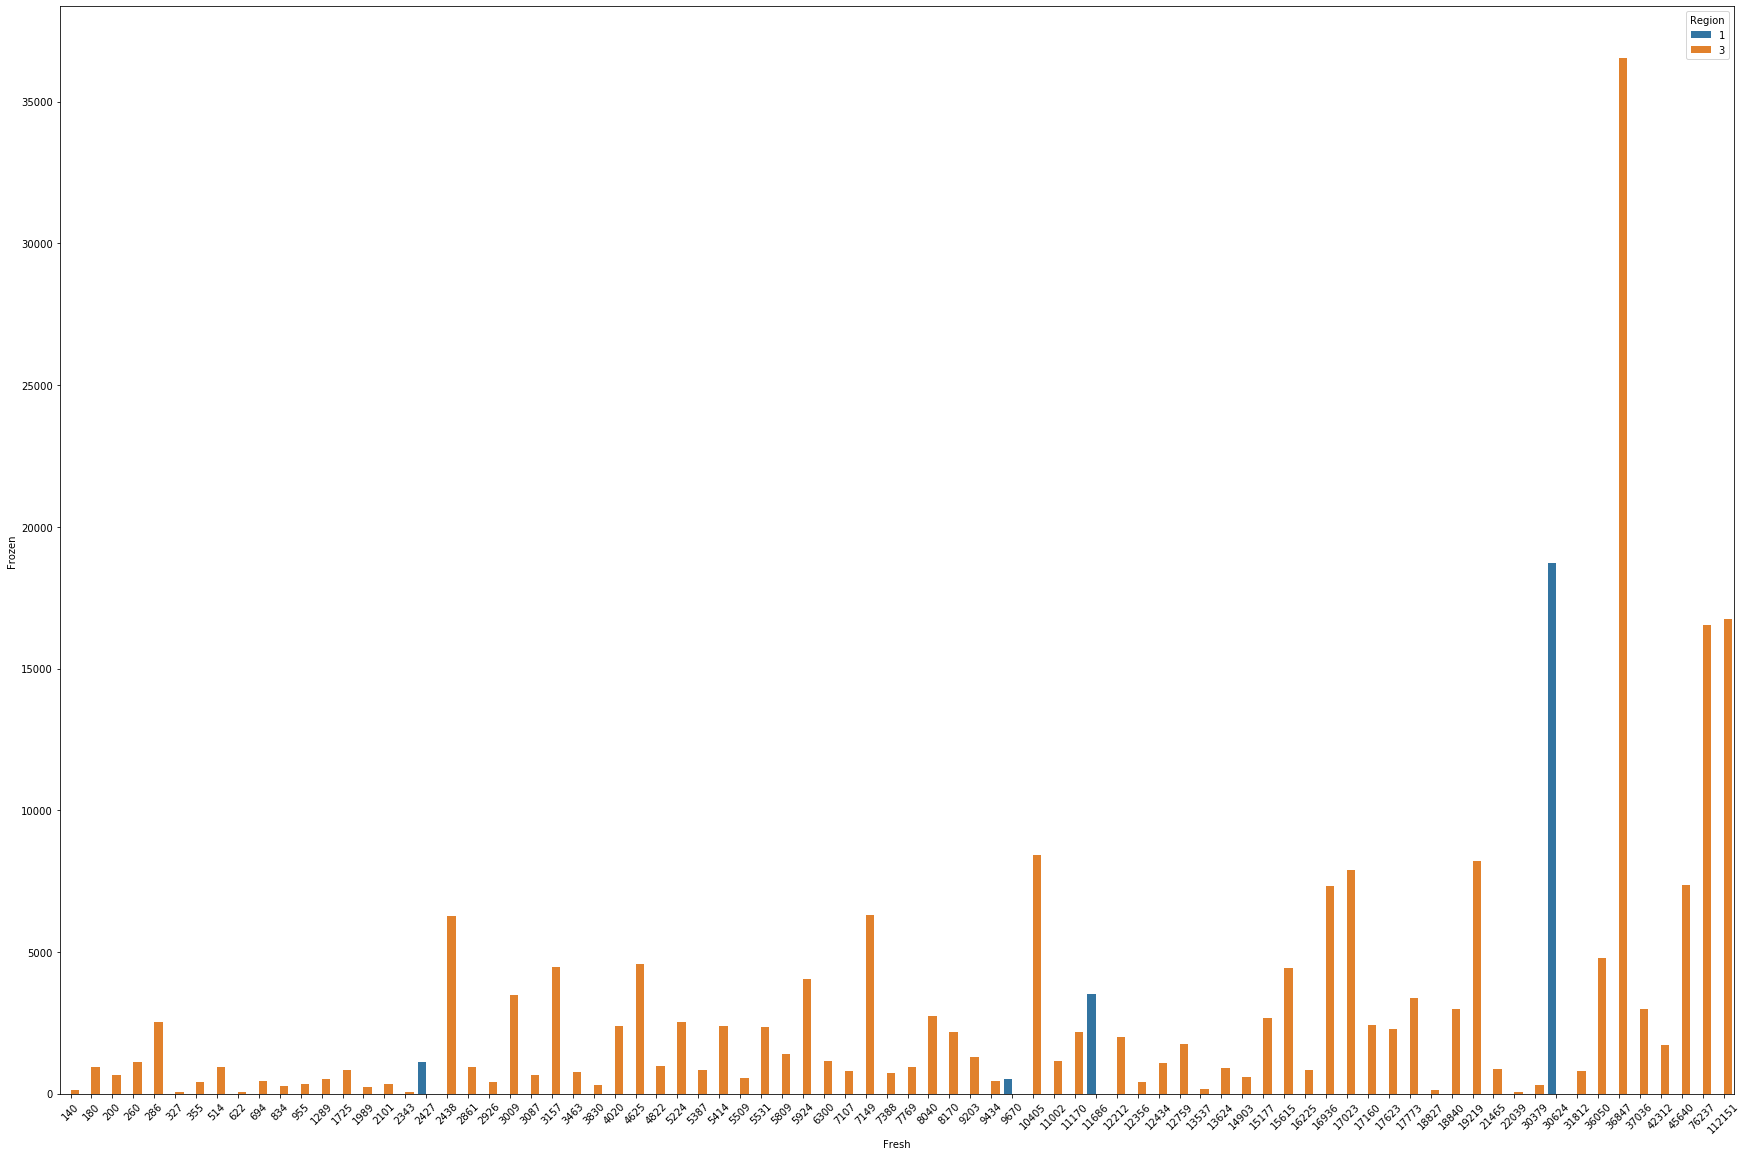

In [928]:
plt.figure(figsize=(30,20))
sns.barplot(x = df.Fresh[120:200], y = df.Frozen[120:200], hue=df.Region[120:200],data = df)
plt.xticks(rotation=45)
plt.show()

# Scatter Plot
We use this plot to discover correlations between every two variables.

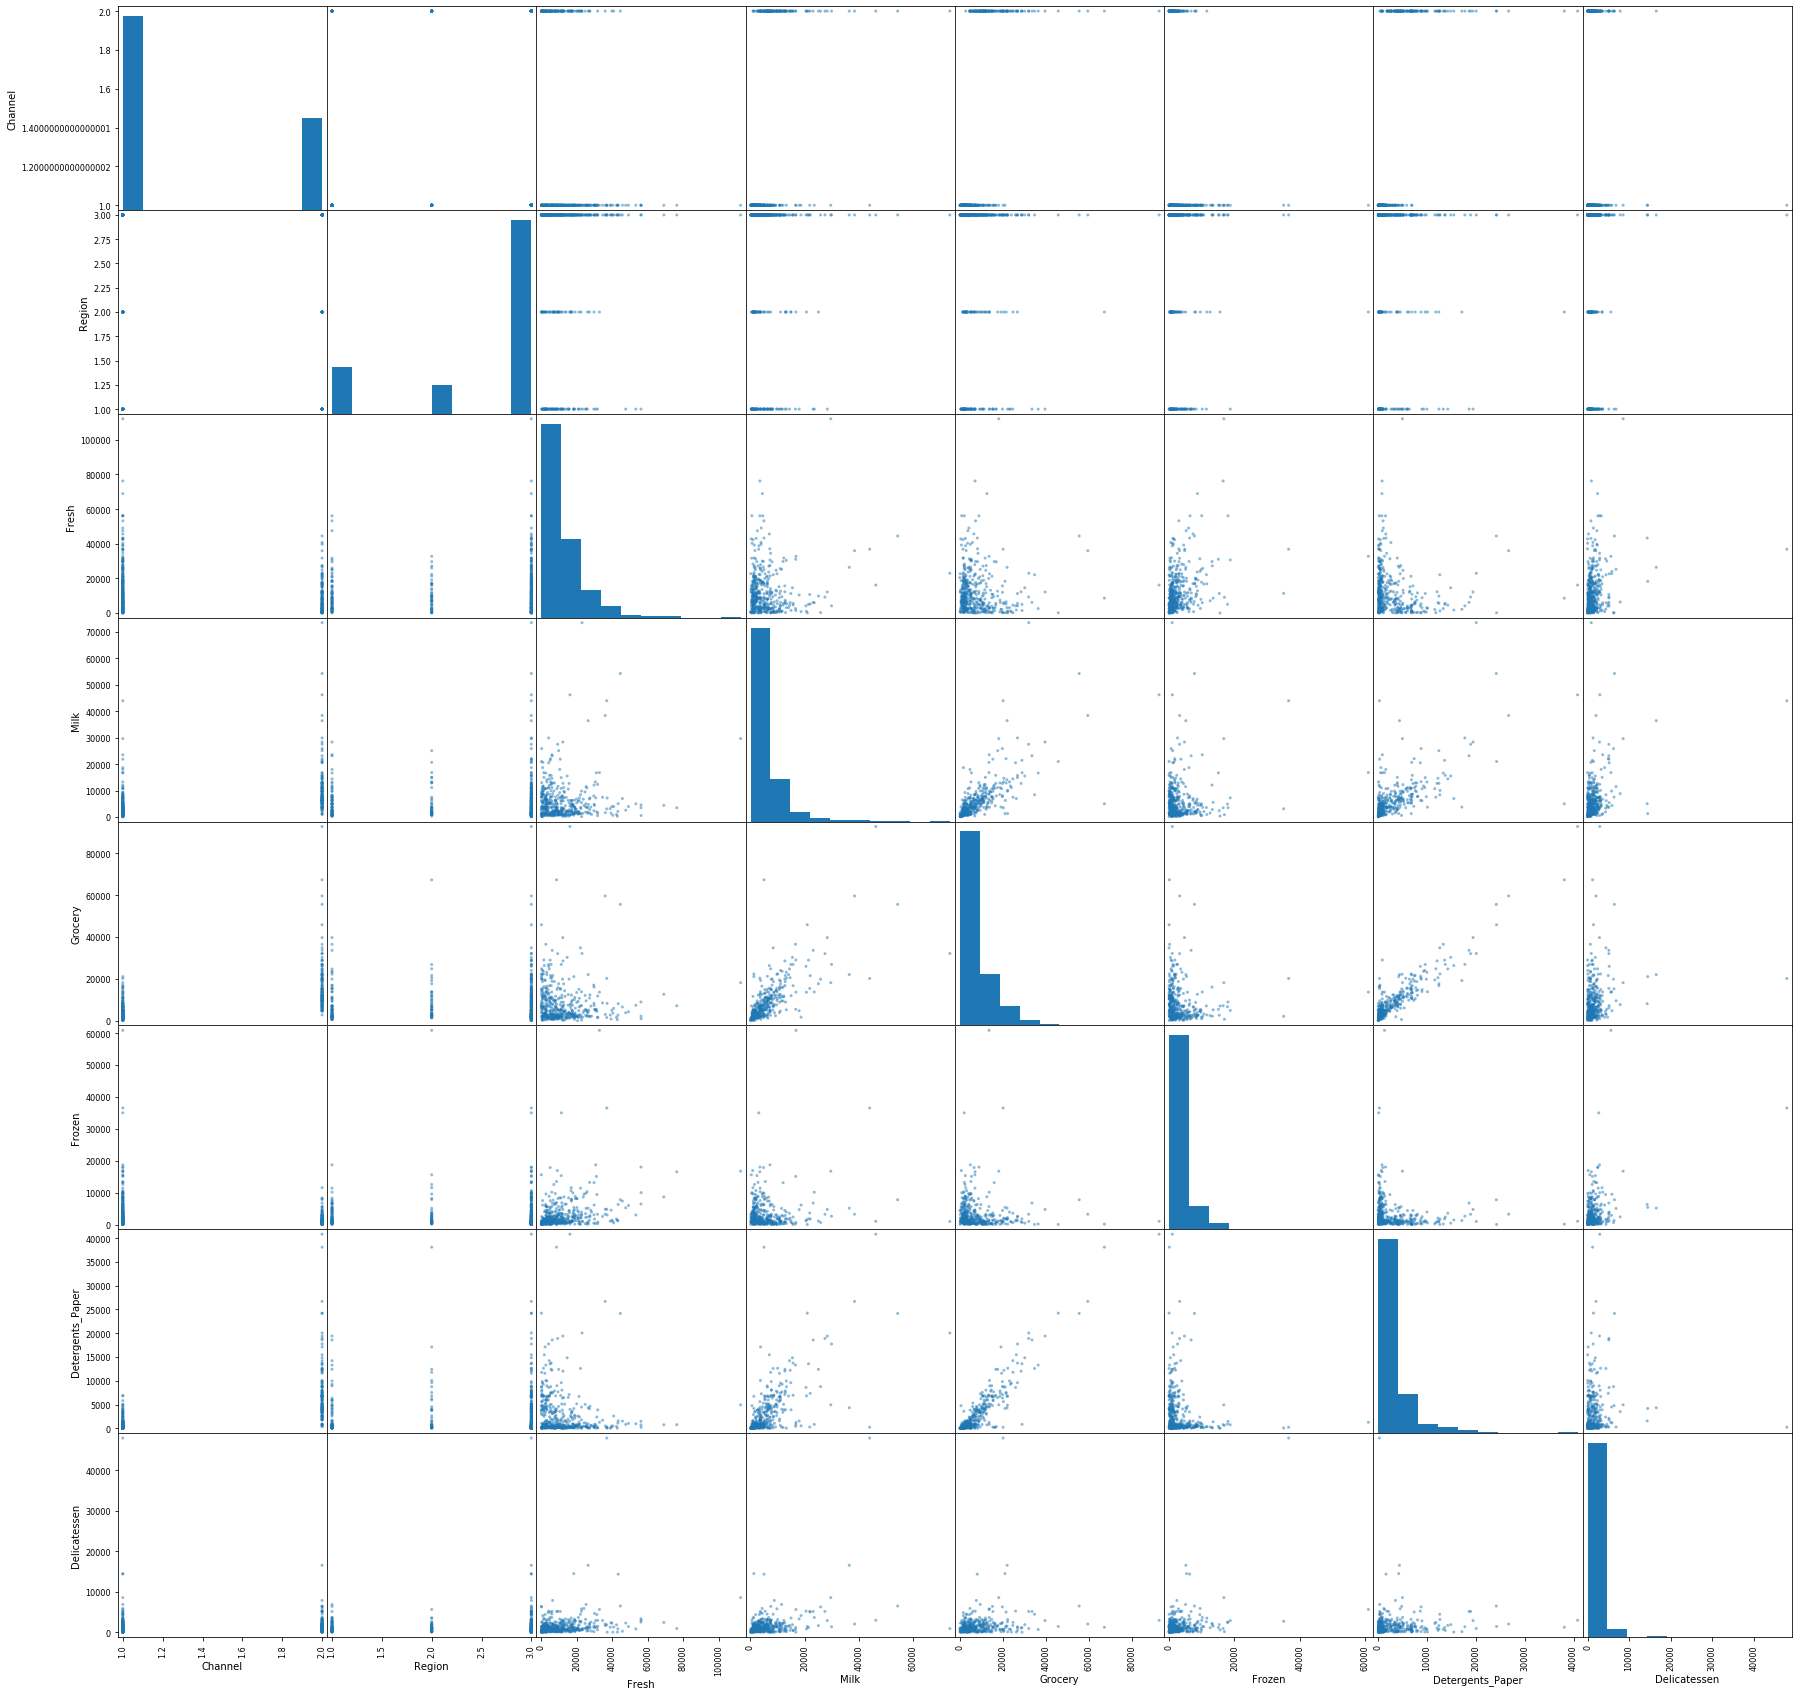

<Figure size 432x288 with 0 Axes>

In [929]:
pd.plotting.scatter_matrix(df,figsize=(30,30))
plt.figure()
plt.show()

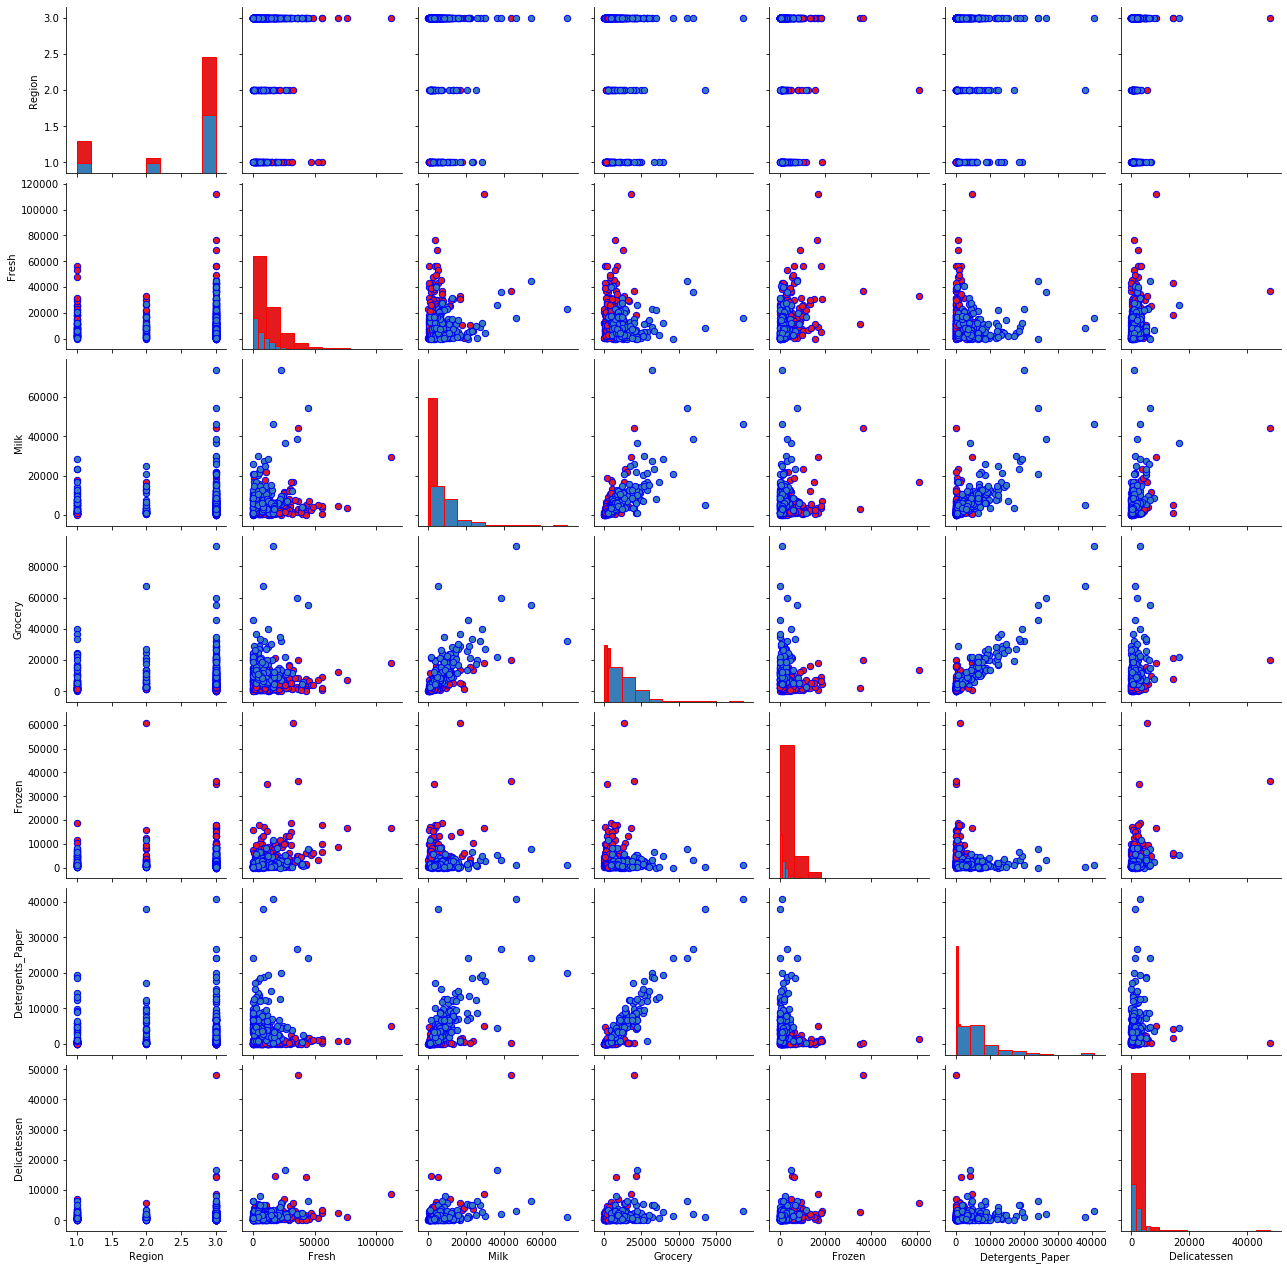

In [930]:
PL = sns.PairGrid(df, hue="Channel", palette="Set1")
PL = PL.map_diag(plt.hist, edgecolor="r")
PL = PL.map_offdiag(plt.scatter, edgecolor="b", s=40)
plt.show()

Discovering Max, min, Mean and Standard Deviation of expenditures on products of each category in different channels, so the producer can design different marketing strategies for each Channel

In [931]:
Chan={1:" Hotel/Restaurant",
    2:"Retail"}

In [932]:
for col in df.columns[2:]: 
    print("-----------------------",col,"-------------------")
    for i in np.sort(df.Channel.unique()):
        print("Channel: ",Chan[i])
        print('Max ',col,max(df[df['Channel']==i][col]))
        print('Min ',col,min(df[df['Channel']==i][col]))
        print('Mean', col,np.mean(df[df['Channel']==i][col]))
        print('Std ',col, np.std(df[df['Channel']==i][col]))
        print("                                              ")
    

----------------------- Fresh -------------------
Channel:   Hotel/Restaurant
Max  Fresh 112151
Min  Fresh 3
Mean Fresh 13475.560402684563
Std  Fresh 13808.460470856648
                                              
Channel:  Retail
Max  Fresh 44466
Min  Fresh 18
Mean Fresh 8904.323943661971
Std  Fresh 8956.011954012378
                                              
----------------------- Milk -------------------
Channel:   Hotel/Restaurant
Max  Milk 43950
Min  Milk 55
Mean Milk 3451.7248322147652
Std  Milk 4344.857143269917
                                              
Channel:  Retail
Max  Milk 73498
Min  Milk 928
Mean Milk 10716.5
Std  Milk 9645.487924011595
                                              
----------------------- Grocery -------------------
Channel:   Hotel/Restaurant
Max  Grocery 21042
Min  Grocery 3
Mean Grocery 3962.1375838926174
Std  Grocery 3539.5595436367316
                                              
Channel:  Retail
Max  Grocery 92780
Min  Grocery 2743
Me

Finding out the total expenditure in different regions of the channels

In [933]:
Expenditure_Channel1=[]
Expenditure_Channel2=[]


for  Reg in np.sort(df.Region.unique()):
    for col in df.columns.unique()[2:]:
        Expenditure_Channel1.append(sum(df[np.logical_and(df['Channel']==1,df['Region']==Reg)][col]))
        Expenditure_Channel2.append(sum(df[np.logical_and(df['Channel']==2,df['Region']==Reg)][col]))

In [934]:
print("Total expenditure in Channel1, Hotel/Restaurant is: ", sum(Expenditure_Channel1),'$')
print("Total expenditure in Channel2, Retail is: ", sum(Expenditure_Channel2),'$')

Total expenditure in Channel1, Hotel/Restaurant is:  7999569 $
Total expenditure in Channel2, Retail is:  6619931 $


In [935]:
Total_expenditure=np.concatenate((Expenditure_Channel1,Expenditure_Channel2),axis=0)
 
for i in range(len(df.Region.unique())):
    print("Total Expenditure in Channel1","and Region",i+1,"is:", sum(Expenditure_Channel1[i*len(df.columns.unique()[2:]):(i+1)*len(df.columns.unique()[2:])]))

print(" ")

for i in range(len(df.Region.unique())):
    print("Total Expenditure in Channel1","and Region",i+1,"is:", sum(Expenditure_Channel2[i*len(df.columns.unique()[2:]):(i+1)*len(df.columns.unique()[2:])]))

        

Total Expenditure in Channel1 and Region 1 is: 1538342
Total Expenditure in Channel1 and Region 2 is: 719150
Total Expenditure in Channel1 and Region 3 is: 5742077
 
Total Expenditure in Channel1 and Region 1 is: 848471
Total Expenditure in Channel1 and Region 2 is: 835938
Total Expenditure in Channel1 and Region 3 is: 4935522


# Kernel Density Estimate, KDE plot
"The KDE plots is used to encode the density of observations on one axis with height along the other axis.
In KDE, each observation is first replaced with a normal (Gaussian) curve centered at that value, Next, these curves are summed to compute the value of the density at each point. The resulting curve is then normalized so that the area under it is equal to 1" (Refrence: https://seaborn.pydata.org/tutorial/distributions.html)

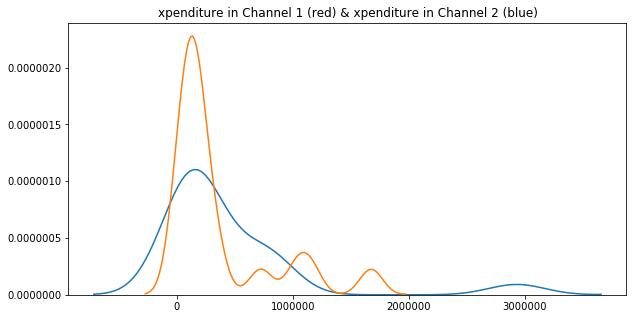

In [936]:
 
plt.figure(figsize=(10,5))
sns.kdeplot(Expenditure_Channel1)
sns.kdeplot(Expenditure_Channel2)
plt.title('xpenditure in Channel 1 (red) & xpenditure in Channel 2 (blue)')
plt.show()

# Scaling Data Frame

Scaling or normalizing features is very important task when we want to use PCA. PCA tries to get the features with high variance and the variance is high for large. This deviate the PCA towards large values. Without scaling, PCA will only consider the large values and neglecting the other. (Reference: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e )

Here we use Log function to normalize features.

In [937]:
Scaled_df= np.log(df)

In [938]:
Scaled_df.drop(['Channel', 'Region'],axis=1).head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


In [939]:
df.drop(['Channel', 'Region'],axis=1).head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


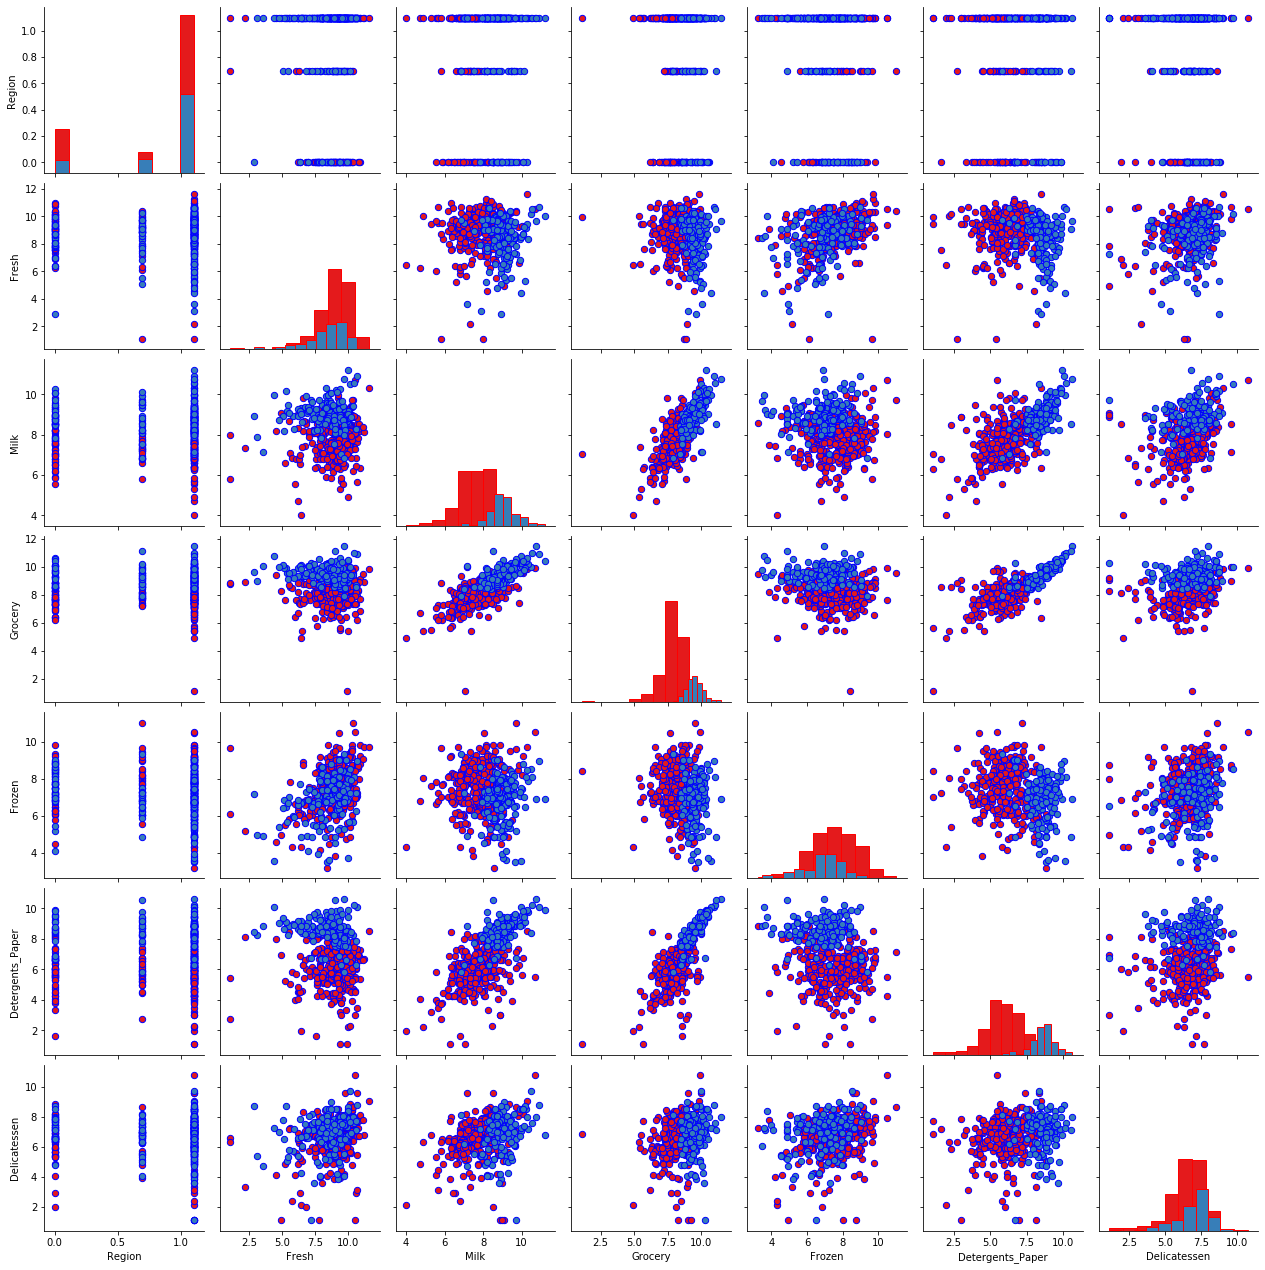

In [940]:
PL = sns.PairGrid(Scaled_df, hue="Channel", palette="Set1")
PL = PL.map_diag(plt.hist, edgecolor="r")
PL = PL.map_offdiag(plt.scatter, edgecolor="b", s=40)
plt.show()

In [941]:
Scaled_df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
320,0.000000,0.693147,7.480992,8.215006,7.731931,6.242223,5.616771,6.726233
133,0.000000,1.098612,9.152075,6.948897,7.118826,6.077642,5.545177,5.981414
299,0.000000,0.693147,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828
220,0.000000,0.000000,9.599337,6.801283,7.231287,7.475906,4.025352,6.618739
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
227,0.000000,0.000000,8.304495,7.698029,7.354362,7.734559,5.572154,6.535241
101,0.693147,1.098612,7.258412,9.288227,9.696894,7.373374,8.819665,7.516433
130,0.000000,1.098612,8.874728,7.794823,6.549651,8.750841,5.978886,6.814543
314,0.000000,0.693147,9.270212,7.492760,8.942069,7.301822,6.753438,7.117206
126,0.000000,1.098612,9.863655,7.517521,7.413367,9.011279,5.855072,6.180017


# Removing Unuseful features for clustering

In [942]:
Scaled_df.drop(['Channel', 'Region'],axis=1, inplace=True)

In [943]:
Scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


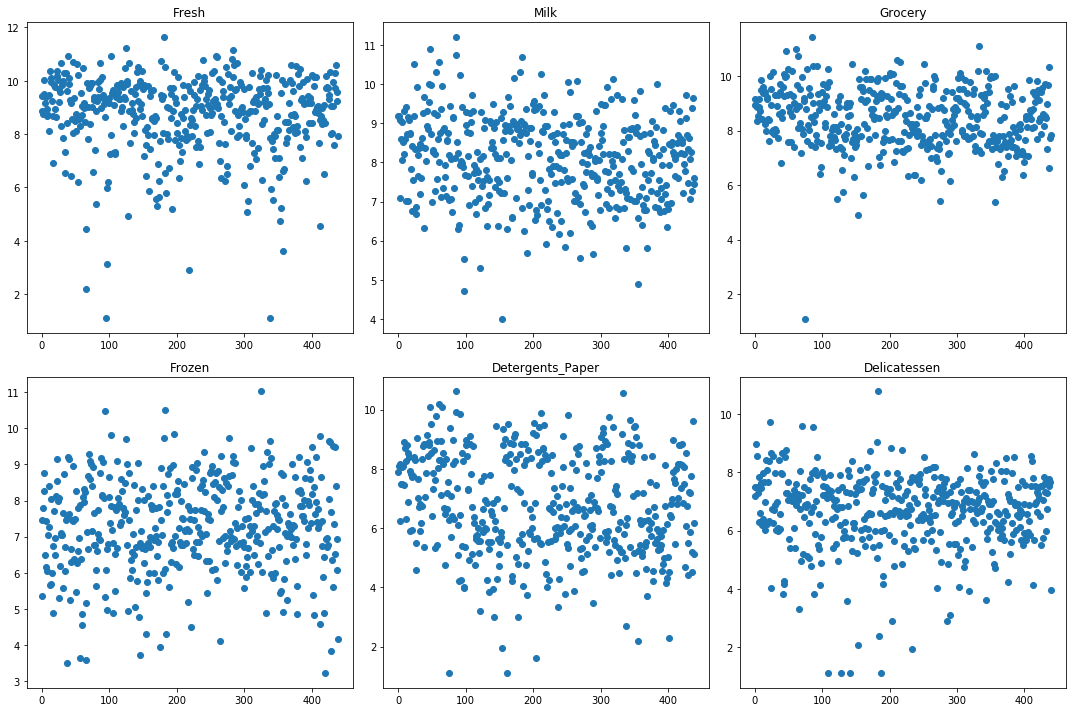

In [944]:
for i,col in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicatessen']):
    plt.subplot(2,3,i+1)
    plt.scatter([i for i in range(440)],Scaled_df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()

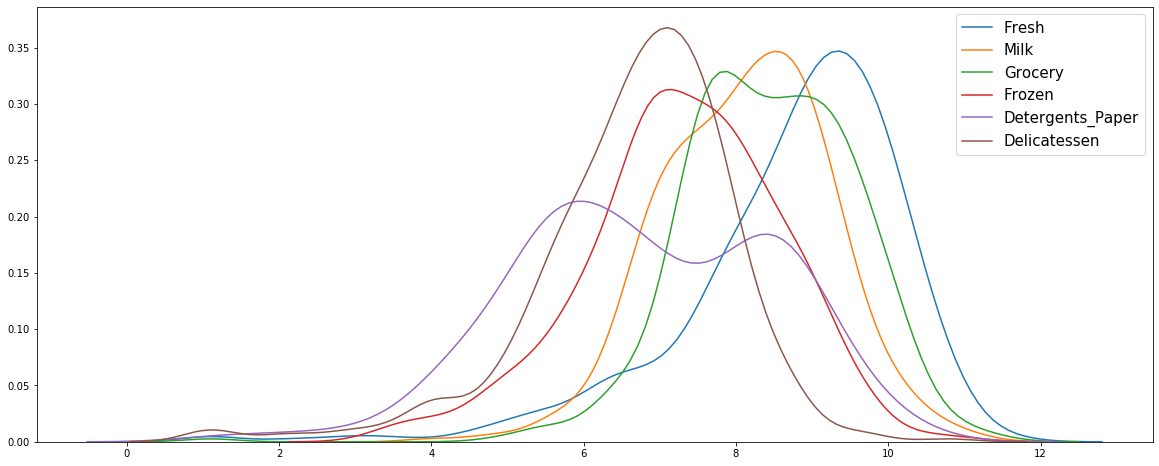

In [945]:
plt.figure(figsize = (20,8))
for cols in Scaled_df.columns.values:
    ax = sns.kdeplot(Scaled_df[cols])
    ax.legend(loc=0, prop={'size': 15})

# Removing Outliers

One way to detect outliers is to use box plot, as you see in figure below there are outlier data that must be removed from dataset

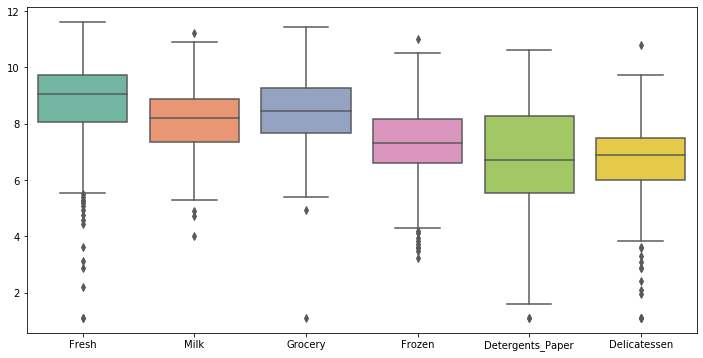

In [946]:
plt.figure(figsize = (12,6))
_ = sns.boxplot(data=Scaled_df, palette="Set2")


# Removing outliers using Quantile 0.25 and 0.75

In [947]:
Q1 = Scaled_df.quantile(0.25)
Q3 = Scaled_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               1.689005
Milk                1.545499
Grocery             1.599237
Frozen              1.566218
Detergents_Paper    2.726239
Delicatessen        1.494854
dtype: float64


In [948]:
Clean_df= Scaled_df[~((Scaled_df< (Q1 - 1.5 * IQR)) |(Scaled_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [949]:
print("Number of Removed Outliers is ",((Scaled_df.shape)[0])-((Clean_df.shape)[0]))

Number of Removed Outliers is  42


# depicting Outliers

In [950]:
To_remove_outliers = []
for feature in Scaled_df.keys():
    
    Q1 = Scaled_df[feature].quantile(0.25)
    Q3 = Scaled_df[feature].quantile(0.75)
    
    print("The outliers for the feature '{}':".format(feature))
    OutLiers= list(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))].index.values)
    display(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))])
    Column=(Scaled_df[~((Scaled_df[feature] >= (Q1 - 1.5 * IQR[feature])) & (Scaled_df[feature] <= (Q3 + 1.5 * IQR[feature])))])
    print(Column[feature])
    To_remove_outliers.extend(OutLiers)   
print("OutLiers are {}".format(To_remove_outliers))


The outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64
The outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64
The outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


75     1.098612
154    4.919981
Name: Grocery, dtype: float64
The outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64
The outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64
The outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64
OutLiers are [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


# Dimenssion Reduction Using PCA

In [951]:
pca=PCA().fit(Clean_df)
print(pca.explained_variance_ratio_)
print()
print(Clean_df.columns.values.tolist())
print(pca.components_)

[0.49930484 0.22594807 0.10488309 0.09781761 0.04879109 0.0232553 ]

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [-0.74520543  0.15440822 -0.02038937  0.26695167 -0.23485013  0.54221164]
 [ 0.26670888  0.13749532  0.0709773  -0.71328102 -0.31568384  0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [-0.05428877 -0.51774387  0.82668599  0.04707807 -0.20803866 -0.00937317]]


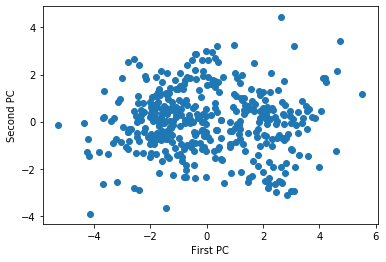

In [952]:
pca=PCA(n_components=2)
pca.fit(Clean_df)
reduced_data=pca.transform(Clean_df)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.show()

In [953]:
print("Shape of Cleaned_df dataset is: ", Clean_df.shape)
print("Shape of Reduced_df dataset is: ", reduced_data.shape)

Shape of Cleaned_df dataset is:  (398, 6)
Shape of Reduced_df dataset is:  (398, 2)


In [954]:
reduced_data=pd.DataFrame(reduced_data,columns=['First_D','Second_D'])
reduced_data[:10]

,First_D,Second_D
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314
5,1.133476,-0.125660
6,1.170126,-0.758369
7,1.659256,0.545866
8,0.846701,-1.082903
9,2.952371,0.222338


# Clustering the Processed Data using KMeans algorithm

For Num. of Clusters:  2  Silhouette score value 0.4471577422934671
For Num. of Clusters:  3  Silhouette score value 0.36487403561180487
For Num. of Clusters:  4  Silhouette score value 0.3321215445650167
For Num. of Clusters:  5  Silhouette score value 0.35279724742804247
For Num. of Clusters:  6  Silhouette score value 0.3627610151267451
For Num. of Clusters:  7  Silhouette score value 0.3558373920722826
For Num. of Clusters:  8  Silhouette score value 0.3618630947516979
For Num. of Clusters:  9  Silhouette score value 0.3667615587335842
For Num. of Clusters:  10  Silhouette score value 0.348267657109839
For Num. of Clusters:  11  Silhouette score value 0.35526369394421153


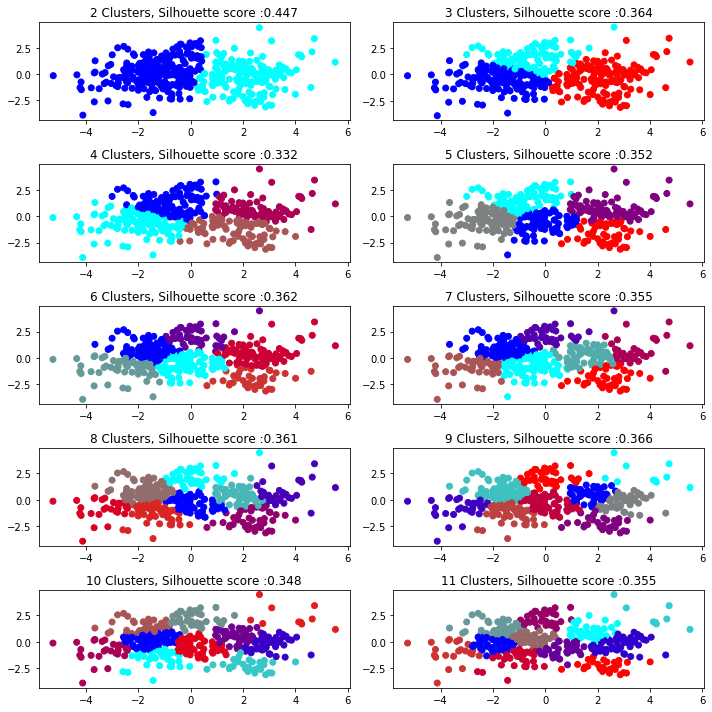

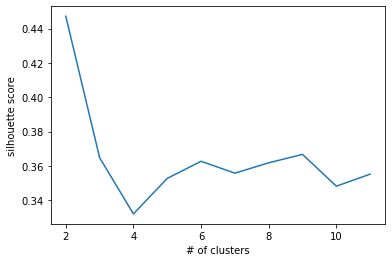

Optimal number of clusters is 2


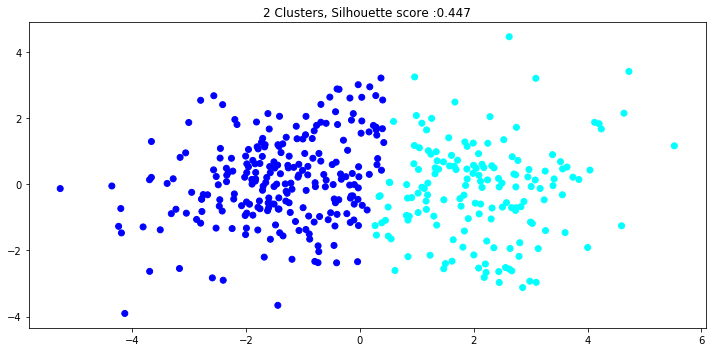

In [955]:
cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])
silhouette_scores=[]
Num_Cluster=[]
for i in range(2,12):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    Num_Cluster.append(i)
    print ("For Num. of Clusters: ", i ," Silhouette score value", silhouette)
    
    plt.subplot(5,2,i-1)
    r_d_v=reduced_data.values
    plt.scatter(r_d_v[:,0],r_d_v[:,1],c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

plt.plot([i for i in range(2,12)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()


ind=silhouette_scores.index(max(silhouette_scores))
N_C=Num_Cluster[ind]
print("Optimal number of clusters is {}".format(N_C))

cl=KMeans(n_clusters=N_C,random_state=0)
result=cl.fit_predict(reduced_data)
r_d_v=reduced_data.values
plt.scatter(r_d_v[:,0],r_d_v[:,1],c=result,cmap=cmap)
plt.title(str(N_C)+' Clusters, Silhouette score :'+ str(max(silhouette_scores))[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(10,5)
plt.tight_layout()

# Clustering the Processed Data using DBSCAN algorithm

For eps:  0.5  & min_samples:  4 , Silhouette score value is 0.09748128465962287
For eps:  0.5  & min_samples:  5 , Silhouette score value is 0.3236477830971885
For eps:  0.5  & min_samples:  6 , Silhouette score value is 0.2007624758583689
For eps:  0.5  & min_samples:  7 , Silhouette score value is 0.1842614952033604
For eps:  0.5  & min_samples:  8 , Silhouette score value is 0.17139907857752087
For eps:  0.5  & min_samples:  9 , Silhouette score value is 0.15214091936461557
For eps:  0.7  & min_samples:  4 , Silhouette score value is 0.26065268449159235
For eps:  0.7  & min_samples:  5 , Silhouette score value is 0.38937205994105
For eps:  0.7  & min_samples:  6 , Silhouette score value is 0.3658445741534227
For eps:  0.7  & min_samples:  7 , Silhouette score value is 0.3584009602863605
For eps:  0.7  & min_samples:  8 , Silhouette score value is 0.35005601666821995
For eps:  0.7  & min_samples:  9 , Silhouette score value is 0.33958679669929726


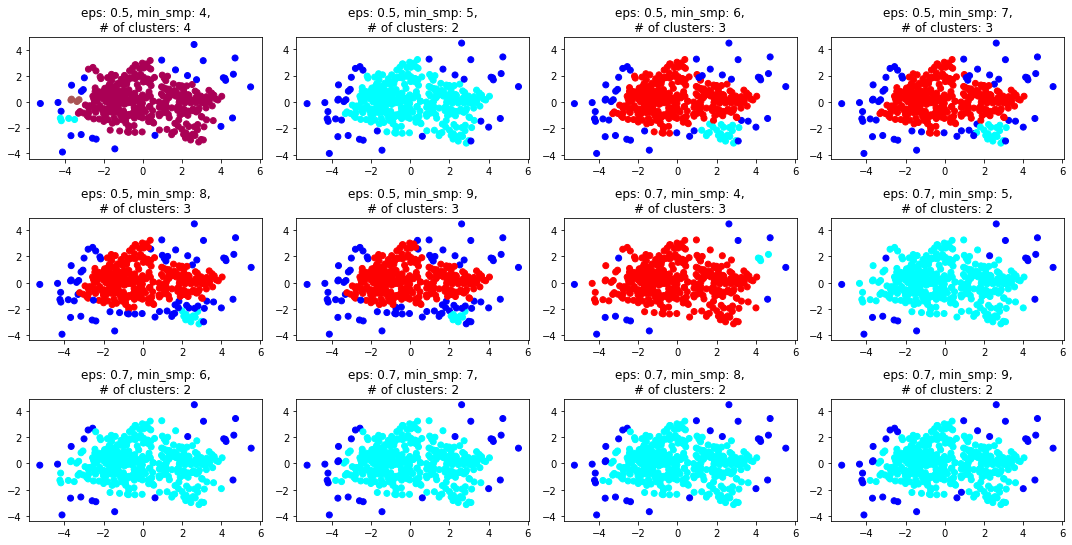

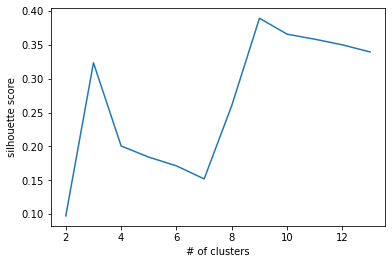

Optimal value of eps is: 0.7
Optimal value of min_samples is: 5


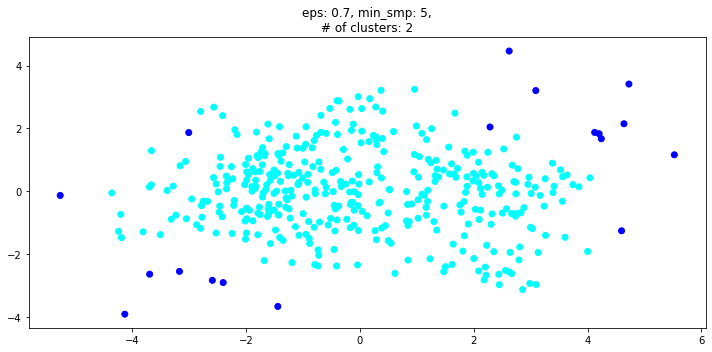

In [956]:
silhouette_scores=[]
eps_N=[]
Min_S=[]


plot_id=0
for eps in np.arange(0.5,0.9,0.2):
    for min_samples in range(4,10):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        silhouette=silhouette_score(reduced_data,result)
        
        silhouette_scores.append(silhouette)
        eps_N.append(eps)
        Min_S.append(min_samples)
        
        print ("For eps: ",eps," & min_samples: ",min_samples,", Silhouette score value is", silhouette)
        
        n_clusters=len([c for c in list(set(result))])
        plt.subplot(8,4,plot_id)
        r_d_v=reduced_data.values
        plt.scatter(r_d_v[:,0], r_d_v[:,1], c=result, cmap=cmap) 
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
        plt.tight_layout()
plt.show()

plt.plot([i for i in range(2,14)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()


ind=silhouette_scores.index(max(silhouette_scores))
eps=eps_N[ind]
min_samples=Min_S[ind]
print("Optimal value of eps is: {}".format(eps))
print("Optimal value of min_samples is: {}".format(min_samples))

cl=DBSCAN(eps=eps,min_samples=min_samples)
result=cl.fit_predict(reduced_data)

n_clusters=len([c for c in list(set(result))])
r_d_v=reduced_data.values
plt.scatter(r_d_v[:,0], r_d_v[:,1], c=result, cmap=cmap) 
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(10,5)
plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
plt.tight_layout()


# Clustering the Processed Data using GaussianMixture algorithm

For Num. Of Clusters: 2 Silhouette score value is:  0.446753526944537
For Num. Of Clusters: 3 Silhouette score value is:  0.2693600476547917
For Num. Of Clusters: 4 Silhouette score value is:  0.30523094305798926
For Num. Of Clusters: 5 Silhouette score value is:  0.29321253848450163
For Num. Of Clusters: 6 Silhouette score value is:  0.31695672748005377
For Num. Of Clusters: 7 Silhouette score value is:  0.3163019573755038
For Num. Of Clusters: 8 Silhouette score value is:  0.30177832093525203
For Num. Of Clusters: 9 Silhouette score value is:  0.3120294849887281
For Num. Of Clusters: 10 Silhouette score value is:  0.3154839243023111
For Num. Of Clusters: 11 Silhouette score value is:  0.3327170498619492


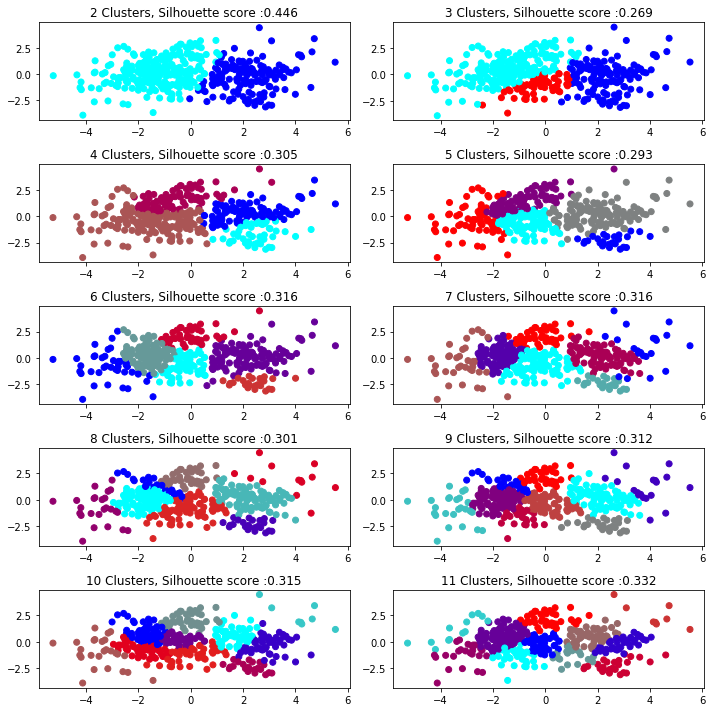

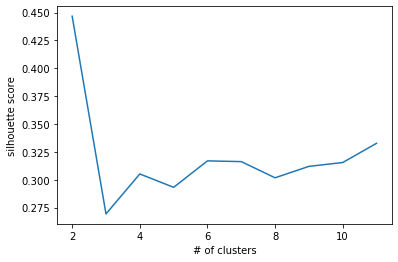

Optimal number of clusters is: 2


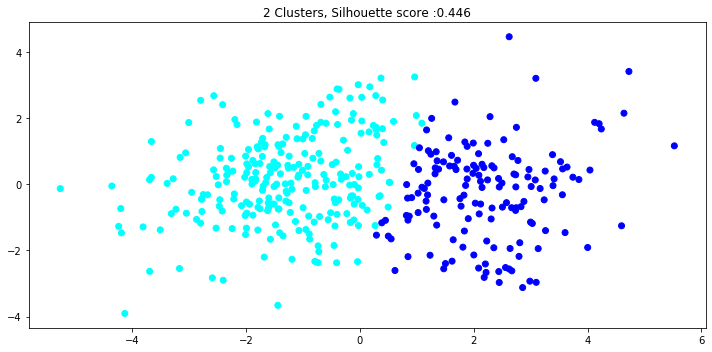

In [957]:
silhouette_scores=[]
N_Comp=[]
for i in range(2,12):
    cl= GaussianMixture(n_components=i)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    N_Comp.append(i)
    
    print ("For Num. Of Clusters:",i, "Silhouette score value is: ", silhouette)
    
    plt.subplot(5,2,i-1)
    r_d_v=reduced_data.values
    plt.scatter(r_d_v[:,0], r_d_v[:,1], c=result, cmap=cmap) 
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

plt.plot([i for i in range(2,12)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()


ind=silhouette_scores.index(max(silhouette_scores))
N_C=N_Comp[ind]
print("Optimal number of clusters is: {}".format(N_C))

cl= GaussianMixture(n_components=N_C)
result=cl.fit_predict(reduced_data)
r_d_v=reduced_data.values
plt.scatter(r_d_v[:,0],r_d_v[:,1],c=result,cmap=cmap)
plt.title(str(N_C)+' Clusters, Silhouette score :'+ str(max(silhouette_scores))[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(10,5)
plt.tight_layout()

